<a href="https://colab.research.google.com/github/naren-17/BOOTCAMP/blob/main/Day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
data = iris.data

In [ ]:
X = data[:,:2]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
k = 3
km = KMeans(n_clusters = k, random_state = 40, n_init = 10)
km.fit(X_scaled)
labels = km.labels_
centroids = km.cluster_centers_

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


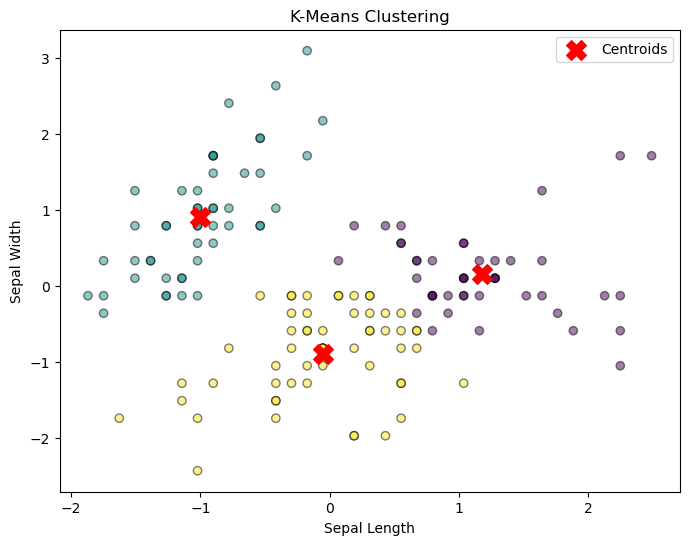

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = labels, cmap = "viridis", marker = 'o', edgecolor = 'k', alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering')
plt.legend()

# **Task 2**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
data = iris.data

In [3]:
X = data[:, :2]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
def plot_kmeans(random_state, ax):
    kmeans = KMeans(n_clusters = 3, random_state = random_state, n_init = 1)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.6)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    ax.set_title(f'Random State = {random_state}')
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.legend()

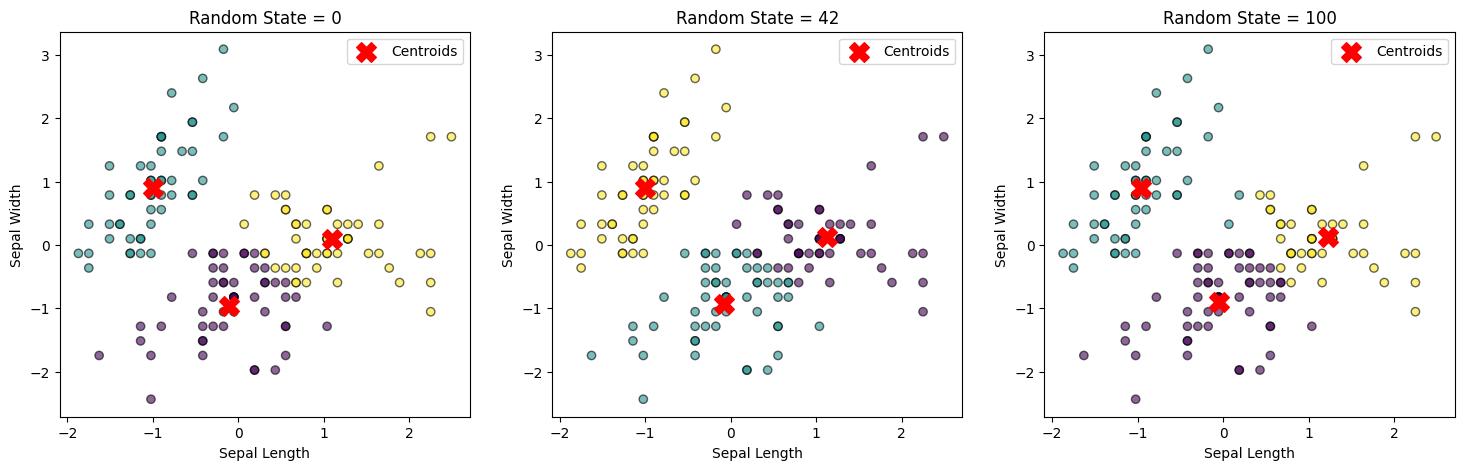

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
random_states = [0, 42, 100]
for i, state in enumerate(random_states):
    plot_kmeans(state, axes[i])

plt.show()


# **Task 3**

In [9]:
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame(iris.data, columns=iris.feature_names)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


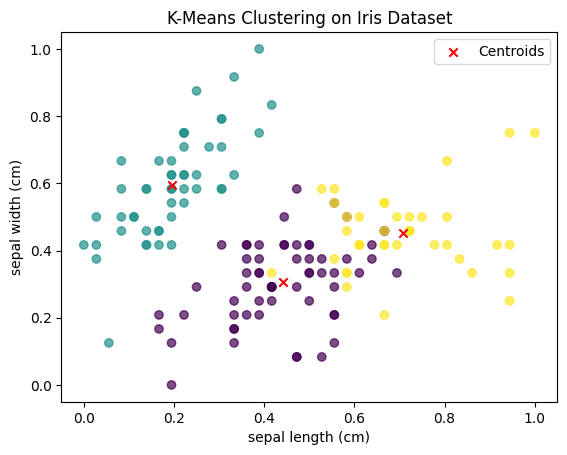

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['cluster'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

In [12]:
print(df_scaled.groupby('cluster').mean())

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 0.441257          0.307377           0.575715   
1                 0.196111          0.595000           0.078305   
2                 0.707265          0.450855           0.797045   

         petal width (cm)  
cluster                    
0                0.549180  
1                0.060833  
2                0.824786  


# **Task 4**

In [17]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


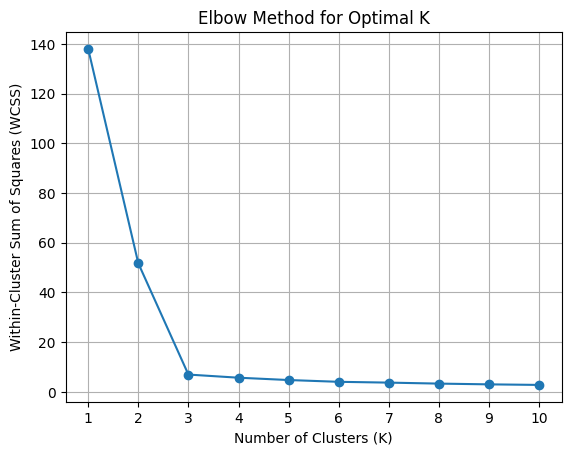

In [16]:
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid()
plt.show()

# **Task 5**

In [18]:
cluster_summary = df_scaled.groupby('cluster').agg(['mean', 'count'])

In [19]:
print(cluster_summary)

        sepal length (cm)       sepal width (cm)       petal length (cm)  \
                     mean count             mean count              mean   
cluster                                                                    
0                0.441257    61         0.307377    61          0.575715   
1                0.196111    50         0.595000    50          0.078305   
2                0.707265    39         0.450855    39          0.797045   

              petal width (cm)        
        count             mean count  
cluster                               
0          61         0.549180    61  
1          50         0.060833    50  
2          39         0.824786    39  


In [21]:
(cluster_summary).value_counts()

,,,,,,,,count
"(sepal length (cm), mean)","(sepal length (cm), count)","(sepal width (cm), mean)","(sepal width (cm), count)","(petal length (cm), mean)","(petal length (cm), count)","(petal width (cm), mean)","(petal width (cm), count)",
0.196111,50,0.595000,50,0.078305,50,0.060833,50,1
0.441257,61,0.307377,61,0.575715,61,0.549180,61,1
0.707265,39,0.450855,39,0.797045,39,0.824786,39,1


# **Task 6**

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_pca['cluster'] = kmeans.fit_predict(df_pca)


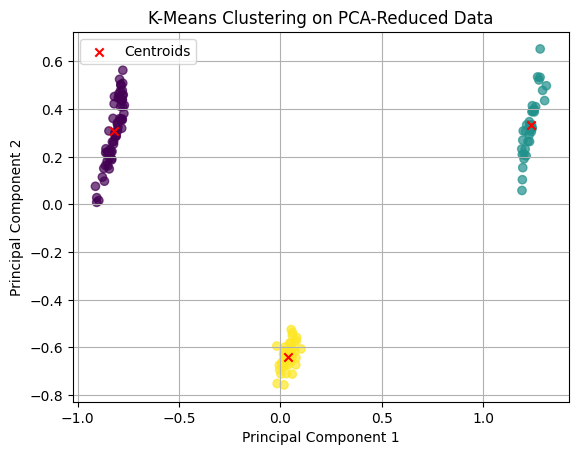

In [25]:

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.legend()
plt.grid()
plt.show()